In [125]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# create a dataframe with two column, one being a category
data = [  (12,'A', 99, 'ZA')
        , (15,'B', 98, 'ZB')
        , (18,'B', 97, 'ZA')
        , (21,'A', 96, 'ZC')
        , (24,'C', 95, 'ZA')
        , (27,'C', 94, 'ZD')
        , (30,'D', 93, 'ZA')
       ]

cols = ['IDx','LetCat','Mrk','Z']
dfdata = pd.DataFrame(data, columns = cols)
dfdata


,IDx,LetCat,Mrk,Z
0,12,A,99,ZA
1,15,B,98,ZB
2,18,B,97,ZA
3,21,A,96,ZC
4,24,C,95,ZA
5,27,C,94,ZD
6,30,D,93,ZA


# Categorizations

In [27]:
pd.get_dummies(dfdata.LetCat)

,A,B,C,D
0,True,False,False,False
1,False,True,False,False
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False
5,False,False,True,False
6,False,False,False,True


In [74]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(dfdata)

In [75]:
encoded_data

array([[0., 0., 7., 0.],
       [1., 1., 6., 1.],
       [2., 1., 5., 0.],
       [3., 0., 4., 2.],
       [4., 2., 3., 0.],
       [5., 2., 2., 3.],
       [6., 3., 1., 0.],
       [7., 4., 0., 4.]])

In [41]:
ordinal_encoder.categories_

[array([12, 15, 18, 21, 24, 27, 30]),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array([93, 94, 95, 96, 97, 98, 99]),
 array(['ZA', 'ZB', 'ZC', 'ZD'], dtype=object)]

In [94]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
encoded1hot_data = cat_encoder.fit_transform(dfdata[['LetCat']])
encoded1hot_data = cat_encoder.fit_transform(dfdata[['LetCat','Z']])
#encoded1hot_data = cat_encoder.fit_transform(dfdata)

In [95]:
encoded1hot_data

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [96]:
cat_encoder.categories_

[array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['ZA', 'ZB', 'ZC', 'ZD', 'ZE'], dtype=object)]

In [97]:
cat_encoder.feature_names_in_

array(['LetCat', 'Z'], dtype=object)

In [105]:
newrow = [33,'E', 92, 'ZE']
dfdata.loc[7] = newrow
pd.get_dummies(dfdata.LetCat)

,A,B,C,D,E
0,True,False,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,True,False
7,False,False,False,False,True


In [99]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(dfdata[['LetCat','Z']])
#cat_encoder.transform(dfdata)

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [100]:
cat_encoder.get_feature_names_out()

array(['LetCat_A', 'LetCat_B', 'LetCat_C', 'LetCat_D', 'LetCat_E', 'Z_ZA',
       'Z_ZB', 'Z_ZC', 'Z_ZD', 'Z_ZE'], dtype=object)

In [101]:
#dfdata4training = pd.DataFrame(cat_encoder.transform(dfdata[['LetCat']]), columns=cat_encoder.get_feature_names_out(), index=dfdata.index)
dfdata4training = pd.DataFrame(cat_encoder.transform(dfdata[['LetCat','Z']]), columns=cat_encoder.get_feature_names_out(), index=dfdata.index)
#dfdata4training = pd.DataFrame(cat_encoder.transform(dfdata), columns=cat_encoder.get_feature_names_out(), index=dfdata.index)
dfdata4training

,LetCat_A,LetCat_B,LetCat_C,LetCat_D,LetCat_E,Z_ZA,Z_ZB,Z_ZC,Z_ZD,Z_ZE
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Feature Scaling

In [107]:
dfdata.describe()

,IDx,Mrk
count,8.000000,8.00000
mean,22.500000,95.50000
std,7.348469,2.44949
min,12.000000,92.00000
25%,17.250000,93.75000
50%,22.500000,95.50000
75%,27.750000,97.25000
max,33.000000,99.00000


In [108]:
dfdata

,IDx,LetCat,Mrk,Z
0,12,A,99,ZA
1,15,B,98,ZB
2,18,B,97,ZA
3,21,A,96,ZC
4,24,C,95,ZA
5,27,C,94,ZD
6,30,D,93,ZA
7,33,E,92,ZE


## MinMaxScaler

In [111]:
# get numeric fields only
dfdata_num = dfdata.select_dtypes(include=[np.number])
print(dfdata_num)

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
mm_scaled = min_max_scaler.fit_transform(dfdata_num)
mm_scaled

   IDx  Mrk
0   12   99
1   15   98
2   18   97
3   21   96
4   24   95
5   27   94
6   30   93
7   33   92


array([[0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [1.        , 0.        ]])

In [116]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
mm_scaled = min_max_scaler.fit_transform(dfdata_num)
mm_scaled

array([[-1.        ,  1.        ],
       [-0.71428571,  0.71428571],
       [-0.42857143,  0.42857143],
       [-0.14285714,  0.14285714],
       [ 0.14285714, -0.14285714],
       [ 0.42857143, -0.42857143],
       [ 0.71428571, -0.71428571],
       [ 1.        , -1.        ]])

In [121]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
srd_scaled = std_scaler.fit_transform(dfdata_num)
srd_scaled

array([[-1.52752523,  1.52752523],
       [-1.09108945,  1.09108945],
       [-0.65465367,  0.65465367],
       [-0.21821789,  0.21821789],
       [ 0.21821789, -0.21821789],
       [ 0.65465367, -0.65465367],
       [ 1.09108945, -1.09108945],
       [ 1.52752523, -1.52752523]])

In [ ]:
### Effect of heavily skewed dataset (long tails)

In [195]:
# generate a skewed list
samples = 1000000
shape, scale = 2., 1. # mean and width
skewed_list = list(np.random.standard_gamma(shape, samples))
skewed_list.sort()


In [203]:
import scipy.special as sps 

def plothist(dataset, bins, shape, scale):
    count, bins_x, ignored = plt.hist(dataset, bins, density=True)
    #y = bins_x**(shape-1) * ((np.exp(-bins_x/scale))/ (sps.gamma(shape) * scale**shape))
    #plt.plot(bins_x, y, linewidth=2, color='r')  
    plt.show()

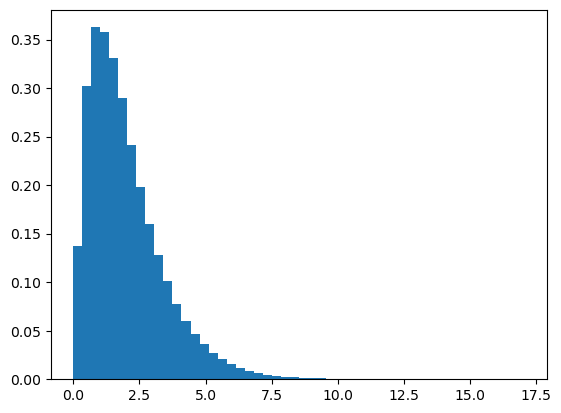

In [204]:
plothist(skewed_list, 50, shape, scale)

These can be mitgated by taking the log or some ppower of the value and use those instead of the actual data value

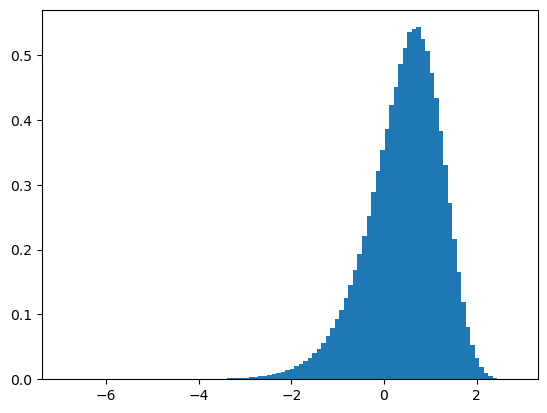

In [209]:
skewed_list_l = np.log(skewed_list)
plothist(skewed_list_l, 100, shape, scale)

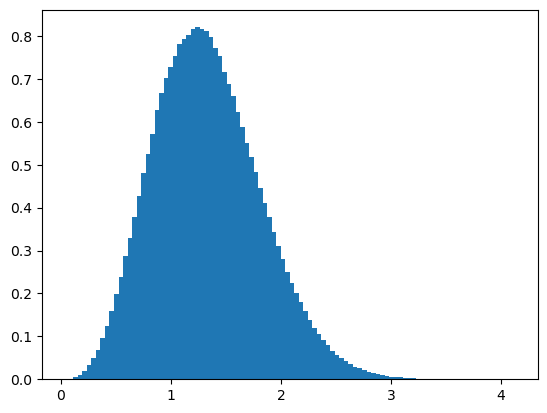

In [208]:
skewed_list_p = np.power(skewed_list, 0.5)
plothist(skewed_list_p, 100, shape, scale)